In [1]:
### BEGIN hide_toggle
### Update 30/10-'20
def hide_toggle_code(off=0):
    """This function generates HTML code to toggle the display of an input
    cell.
    
    The output of the cell will still be displayed.  This can be used
    to hide (from immediate view) some code to generate data or the
    like.  It can also be used to hide other notebook explicit
    implementations - e.g., C++ processing, or the like.
    
    Note, calling this function alone will not enable toggling.
    Instead, we must wrap the generated code in an
    `IPython.display.HTML` object and return that as the cell value.
    This will let IPython evaluate the HTML code and pass it on to the
    browser.
    
    If all one wants is to toggle a cell one can use the function
    `hide_toggle` below.  However, we can also combine the code
    generated here with other HTML code - for example _style_
    declarations and pass that along embedded in an HTML object.
    
    Parameters
    ----------
    off : int 
        Offset of cell to hide relative to the cell calling this function 
    
    Returns
    -------
    code : str 
        HTML code to enable toggling of the cell

    """
    from random import randint 
    from IPython.display import HTML 
    
    jp_cell     = 'document.getElementsByClassName("jp-Cell jp-mod-selected")[0]'
    jq_cell     = '$("div.cell.code_cell.rendered.selected")'
    toggle_text = 'Please close'
    cell_id     = str(randint(1,2**64))
    func_name   = f'code_toggle_{cell_id}'
    
    scr1 = f'''
    <script id="s{cell_id}">
      function {func_name}() {{
          if (typeof $ == "undefined") {{
              // console.log("For JupyterLab (no jQuery)")
              var c  = {jp_cell};
              // console.log(c);
              var iw = c.getElementsByClassName("jp-Cell-inputArea")[0];
              var op = c.getElementsByClassName("jp-OutputPrompt")[0];
              // console.log(iw,op)
              if (iw.style.display !== undefined && iw.style.display === "none") {{
                  iw.style.display = null;
                  op.style.display = null;
              }} else {{
                  iw.style.display = "none";
                  op.style.display = "none";
              }}
           }}
           else {{
                {jq_cell}.find("div.input").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.out_prompt_overlay.prompt").toggle();
                {jq_cell}.find("div.prompt.output_prompt").toggle();
           }}
      }}  
    </script>
    '''
    but = f'''
    <!-- <details style='z-index:99,position:relative;color:lightgray' 
             ontoggle='javascript:{func_name}()'>
        <summary></summary>
        {toggle_text}
    </details> -->    
    '''
    scr2 = f'''
    <script>
      var c = null;
      if (typeof $ == "undefined") {{
         var c  = document.getElementById("s{cell_id}");
         var p  = c.parentNode.parentNode.parentNode.parentNode.parentNode;
         var iw = p.getElementsByClassName("jp-Cell-inputArea")[0];
         var op = p.getElementsByClassName("jp-OutputPrompt")[0];
         var ou = c.parentNode;
         iw.style.display = "none";
         op.style.display = "none";
         ou.style.background = "transparent";
      }}
      else {{
          var p = $('#s{cell_id}').parents();
          p.siblings('div.input').hide();
          p.find('div.prompt.output_prompt').hide()
          p.find('div.out_prompt_overlay.prompt').hide()      
      }}
      // {func_name}
    </script>
    '''
    return scr1+but+scr2        

def hide_toggle(off=0,cnt=None):
    """This will wrap the HTML code returned from the above function
    in an `IPython.display.HTML` object so that the notebook will 
    evaluate the HTML code. 
    
    This function is what we will use most of the time.  However, 
    the function `hide_toggle_code` can be combined with other code 
    and then be put  into an HTML object to let the notebook evaluate
    all the code. 

    Parameters 
    ----------
    off : int 
        Cell offset relative to calling cell which we should toggle 
    cnt : int or None 
        If not None, set the execution count to this number 
        (currently broken)
        
    Returns
    -------
    object : IPython.display.HTML 
        HTML object wrapping code to toggle cell 
    """
    from IPython.display import HTML
    if cnt is not None:
        get_ipython().execution_count = cnt
    return HTML(hide_toggle_code(off))
### END hide_toggle

### BEGIN show_all
def _show_all():
    try:
        from IPython.core.interactiveshell import InteractiveShell
        InteractiveShell.ast_node_interactivity = "all"
    except:
        pass 
### END show_all
    
### BEGIN setup_matplotlib
### Update 30/10-'20
def _setup_matplotlib():
    """Set-up Matplotlib parameters. 
    
    We specify that we want both PDF and PNG images, and 
    that the default image size should be 8 by 8 inches 
    
    We also disable warnings about too many open figures 
    """
    %matplotlib inline 
    from matplotlib import rcParams 
    
    rcParams['figure.max_open_warning'] = 0
    rcParams['font.serif'] = ['Palatino'] + rcParams['font.serif']
    rcParams['font.family'] = ['serif']
    rcParams['mathtext.fontset'] = 'dejavuserif'
    rcParams['axes.formatter.use_mathtext'] = True
    
    try:
        from IPython.display import set_matplotlib_formats
        set_matplotlib_formats('png','pdf')
    except Exception as e:
        pass 
    
_setup_matplotlib()
### END setup_matplotlib
_setup_matplotlib()

### BEGIN css_styling
### Update 30/10-'20
def css_styling_code():
    """This function returns HTML code to customize the CSS 
    of the notebook 
    
    - The text font to be Palatino (serif)
    - Headers are oblique (italic)
    - Extra spacing below H1 headers 
    - Extra spacing spacing above H1 headers 
    - Headers have larger fonts, and is set in normal weight
    - Remove padding around code cells 
    - Code uses the fint "Source Code Pro" (or monospace)
    - Code background is changed to light yellow 
    - Output background is set to lavender
    
    The function combines these CSS declarations with the HTML 
    code from `hide_toggle_code` above so what we automatically 
    hide this code from the user. 
    """
    styles = '''
    <style>
    .rendered_html, .jp-RenderedHTMLCommon {
        font-family: Palatino, serif
    }
    h1, h2, h3, h4, .jp-RenderedHTMLCommon h1, .jp-RenderedHTMLCommon h2, .jp-RenderedHTMLCommon h3, .jp-RenderedHTMLCommon h4{
        font-style: oblique;  
    }
    .rendered_html h1:first-child, .jp-RenderedHTMLCommon h1:first-child {
        margin-top: 4ex;
    }
    .rendered_html h1, .jp-RenderedHTMLCommon h1 {
        margin-bottom: 2ex;
        font-weight: normal;
        font-size: 220%;
    }
    .rendered_html h2, .jp-RenderedHTMLCommon h2 {
        font-weight: normal;
        font-size: 180%;
    }
    .rendered_html h3, .jp-RenderedHTMLCommon h3 {
        font-weight: normal
    }
    .rendered_html h4, .jp-RenderedHTMLCommon h4 {
        font-weight: normal
    }
    .rendered_html p code {
        padding: 0;
    }
    .CodeMirror, .jp-Notebook .CodeMirror.cm-s-jupyter, code, div.input_area {
        font-family: "Source Code Pro", source-code-pro,Consolas, monospace;
        background: lightyellow;
    }
    .output_text, .output_stream, .output_stdout, .jp-OutputArea-executeResult .jp-OutputArea-output {
        background: lavender;
    }
    .output_error {
        background-color: #fff2f2;
    }
    .rendered_html .celltag_alert-info li {
        list-style-image:  url(data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAABAAAAAQCAYAAAAf8/9hAAAAAXNSR0IArs4c6QAAAAZiS0dEAP8A/wD/oL2nkwAAAAlwSFlzAAALEwAACxMBAJqcGAAAAAd0SU1FB9gEGxE4IQYzJ14AAAI3SURBVDjLZZNPSFVBFIe/e9+zd3silBCl0SZoU4s2rVq0EB5tQip4UNvATVGu3QRBiyAi2iltWkgbF5EgRhFFRpiWtrWIzDIV1Pzz7p15M2fmtvDevOqBw8DM9zvnN8ycgF3R/eDtM2mac96ZdrFNxBikqbRV+vHH/ut9gAZczoe7C3gnF0f6au1OLM5avFi8d1Ea+JvAMSAq8nsKOGs5f2cYJ3Y7rc2PO4BqkS8DdD98f9tbe1ysCoxOBo1qlEXHJWcM4b5KPU19zleA0o4Clx99eO3EdqVewHsCoFRugUoVghJO7A6H6Vx9wdtYi27cr5x6dy/03nVtWTU7bWeZh6jNUcAiCaFTURl9A+gs56AviHzh3mnqtdPxm6knfQPLU7UaokASQq/agY7yDrG16Mba6Pz48NP56VdrgAApYObGaicPtkovToFLQBKA/WUxTe3FRk4san15aGKgd3Dj560rrdGJS6FT0X9YYvLuiMKL1kAQOpHZ3PqfyZfP41+9PW1VfzX0RXFSECfgNEmSTgImdDruF2O0E8vvqZG1auQubAsKooIYYHpGvwA2g+xndQBHgWa6cG0ih5cW/w6VvEq3nChwCoBvs+bL2Z7VceBHGTDAIrABpMVuhw+4OiLgLIglOLPYBTQAlfErIeCzjRVg1dtEb1kt5Omv+DTV2YssAN+zNdkzC42N9brV8WdvYp07seOdM2Of1F3AAknW0AJpwN6IgEPAEaANaMlcbmZdl7KRBuAfAb+v//yMAJoAAAAASUVORK5CYII=);
    }
    </style>
    <script>
    if (typeof $ !== "undefined") {
  $(function(){
 $(".celltag_alert         .text_cell_render").addClass("alert");
 $(".celltag_alert-info    .text_cell_render").addClass("alert alert-info");
 $(".celltag_alert-warning .text_cell_render").addClass("alert alert-warning");
 $(".celltag_alert-danger  .text_cell_render").addClass("alert alert-danger");
 $(".celltag_alert-success .text_cell_render").addClass("alert alert-successs");
      });
    }
    </script>
    '''
    return styles

def css_styling():
    from IPython.display import HTML 
    
    return HTML(hide_toggle_code()+css_styling_code())
### END css_styling
css_styling()

/tmp/ipykernel_180100/1451635092.py:160: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png','pdf')


### Christian Holm Christensen <a class='tocSkip'></a>

# The Landau Distribution<a class='tocSkip'></a>
## In Python <a class='tocSkip'></a>
## 0.1 - November 2020 <a class='tocSkip'></a>

> In this note, we look at the Landau distribution which describes the energy loss of charged particles in thin radiators. 
>
> This document is available in many formats at https://cholmcc.gitlab.io/nbi-python

### Niels Bohr Institutet <a class='tocSkip'></a>

# Introduction 

The [Landau distribution](https://en.wikipedia.org/wiki/Landau_distribution) 

$$f_{\mathrm{L}}(z) = \frac1{\pi}\int_{0}^{+\infty}\mathrm{d}t\,e^{-t\log(t) - zt}\sin(\pi t)\quad,$$ 

describes energy straggeling (or energy loss) of a charged particle through a thin absorber.  As such, it plays a pivotal role in high-energy particle physics when describing the response of detectors to charged particles impinging on material. 

The integral above is very cumbersome to evaluate numerically, and parameterisation of the distribution in terms of polynomials are widely used.  Here, we will offer up an implementation of such an parameterisation in Python. 

# Symbolic

First, we will write up the parameterisation symbolically. 

In [2]:
from sympy import symbols, init_printing, Piecewise, \
    exp, sqrt, log, Matrix, Eq,UnevaluatedExpr, pi, Function

Our input variable $z$ is the location independent variable.  If we want to adjust the most probable value $\Delta$ and width $\xi$ of the distribution, we simply translate by the scaled parameter 

\begin{align*}
  z &\rightarrow \frac{z-\Delta}{\xi}\\
  f_{\mathrm{L}}(z) &\rightarrow \frac1{\xi}f_{\mathrm{L}}(z)\quad,
\end{align*}

where the second line is the normalisation condition. 

In [3]:
z = symbols('z',real=True)

We define our our parameters of the parameterisation as 

In [4]:
pij = symbols('p_:8(:5)',real=True)
qij = symbols('q_:8(:5)',real=True)

which we consider matrixes of the parameters, zero some specific values. 

In [5]:
p = Matrix([list(pij[s*5:(s+1)*5])       for s in range(8)])
q = Matrix([list(qij[s*5:(s+1)*5])       for s in range(8)])
p[0,3:] = [[0]*2]
p[7,2:] = [[0]*3]
q[0,:]  = [[0]*5]
q[7,:]  = [[0]*5]
display(Eq(symbols('p'),p,evaluate=False),
        Eq(symbols('q'),q,evaluate=False))

Eq(p, Matrix([
[p_00, p_01, p_02,    0,    0],
[p_10, p_11, p_12, p_13, p_14],
[p_20, p_21, p_22, p_23, p_24],
[p_30, p_31, p_32, p_33, p_34],
[p_40, p_41, p_42, p_43, p_44],
[p_50, p_51, p_52, p_53, p_54],
[p_60, p_61, p_62, p_63, p_64],
[p_70, p_71,    0,    0,    0]]))

Eq(q, Matrix([
[   0,    0,    0,    0,    0],
[q_10, q_11, q_12, q_13, q_14],
[q_20, q_21, q_22, q_23, q_24],
[q_30, q_31, q_32, q_33, q_34],
[q_40, q_41, q_42, q_43, q_44],
[q_50, q_51, q_52, q_53, q_54],
[q_60, q_61, q_62, q_63, q_64],
[   0,    0,    0,    0,    0]]))

Next, we define a function that calculates ratios of the polynomials by which we parameterise by the distribution. 

In [6]:
def poly(x,a,full=True):
    from functools import reduce 
    
    if full:
        return reduce(lambda old,new: (new + old) * x,a,0)
    return a[-1] + reduce(lambda old,new: (new + old) * x,a[:-1],0)

Then, we define a function that calculates one of the expression we need in the parameterisation. 

In [7]:
def one(u,factor,num_off,den_off,num_coef,den_coef):
    return factor * (num_off + poly(u,num_coef,num_off)) / \
                    (den_off + poly(u,den_coef,den_off))
def one2(u,factor,num_off,den_off,num_coef,den_coef):
    return factor * (num_off + poly2(u,num_coef,num_off)) / \
                    (den_off + poly2(u,den_coef,den_off))


We need the constant $C$, 

In [8]:
C = 1/sqrt(2*pi)
Eq(symbols('C'),C)

Eq(C, sqrt(2)/(2*sqrt(pi)))

and a dummy variable $u$

In [9]:
u = symbols('u',real=True)

We can now define the expression using the function above. 

For $z<-5.5$

In [10]:
u1 = exp(z+1)
c1 = C * exp(-1/u1) / sqrt(u1)
f1 = one(u1, c1, 1, 1, p[0,::-1], q[0,::-1])

For $z < -1$

In [11]:
u2 = exp(-(z+1))
c2 = exp(-u2) * sqrt(u2)
f2 = one(z,  c2, 0, 0, p[1,::-1], q[1,::-1])

For $z<1$ and $z<5$

In [12]:
f3 = one(z,  1,  0, 0, p[2,::-1], q[2,::-1])
f4 = one(z,  1,  0, 0, p[3,::-1], q[3,::-1])

For $z<12$, $z<50$, $z<300$

In [13]:
u5 = 1 / z
c5 = u5**2
f5 = one(u5, c5, 0, 0, p[4,::-1], q[4,::-1])
f6 = one(u5, c5, 0, 0, p[5,::-1], q[5,::-1])
f7 = one(u5, c5, 0, 0, p[6,::-1], q[6,::-1])

Otherwise

In [14]:
u8 = 1 / (z - z * log(z) / (z+1))
c8 = u8**2
f8 = one(u8, c8, 1, 1, p[7,::-1], [0])

We put these together to form the piece-wise function 

In [15]:
l = Piecewise((f1, z<-5.5),
              (f2, z<-1),
              (f3, z<1),
              (f4, z<5),
              (f5, z<12),
              (f6, z<50),
              (f7, z<300),
              (f8, True))
Eq(Function(r'\mathit{f}_{\mathrm{L}}')(z),l)

Eq(\mathit{f}_{\mathrm{L}}(z), Piecewise((sqrt(2)*((p_00 + (p_01 + p_02*exp(z + 1))*exp(z + 1))*exp(z + 1) + 1)*exp(-z/2 - 1/2)*exp(-exp(-z - 1))/(2*sqrt(pi)), z < -5.5), ((p_10 + z*(p_11 + z*(p_12 + z*(p_13 + p_14*z))))*exp(-z/2 - 1/2)*exp(-exp(-z - 1))/(q_10 + z*(q_11 + z*(q_12 + z*(q_13 + q_14*z)))), z < -1), ((p_20 + z*(p_21 + z*(p_22 + z*(p_23 + p_24*z))))/(q_20 + z*(q_21 + z*(q_22 + z*(q_23 + q_24*z)))), z < 1), ((p_30 + z*(p_31 + z*(p_32 + z*(p_33 + p_34*z))))/(q_30 + z*(q_31 + z*(q_32 + z*(q_33 + q_34*z)))), z < 5), ((p_40 + (p_41 + (p_42 + (p_43 + p_44/z)/z)/z)/z)/(z**2*(q_40 + (q_41 + (q_42 + (q_43 + q_44/z)/z)/z)/z)), z < 12), ((p_50 + (p_51 + (p_52 + (p_53 + p_54/z)/z)/z)/z)/(z**2*(q_50 + (q_51 + (q_52 + (q_53 + q_54/z)/z)/z)/z)), z < 50), ((p_60 + (p_61 + (p_62 + (p_63 + p_64/z)/z)/z)/z)/(z**2*(q_60 + (q_61 + (q_62 + (q_63 + q_64/z)/z)/z)/z)), z < 300), (((p_70 + p_71/(z - z*log(z)/(z + 1)))/(z - z*log(z)/(z + 1)) + 1)/(z - z*log(z)/(z + 1))**2, True)))

# Numerically

We implement this for numerical evaluation, using _NumPy_ to vectorize as much as possible.  Note, the mode (or most probable value) of the $f(z)$ as defined above is roughly $-0.22278378$, so we explicitly offset by that to get a distribution with a mode of 0. 

In [16]:
def landau(z,mpv=0,xi=1,off=-0.22278378):
    """Calculates an approximation to the Landau distributions in terms of 
    a piecewise function of polynomials 
    
    Parameters
    ----------
    z : float, array 
        Independent variable 
    mpv : float 
        Most probable value (mode)
    xi : float
        Shape of the distribution 
    off : float 
        Offset of the mode (MPV).  The default value shifts the 
        distribution such that the resulting mode is equal to the 
        parameter `mpv`
        
    Returns
    ------- 
    l : float, array 
        The Landau distribution approximately evaluated at all z 
    """
    from numpy import exp, sqrt, log, array, searchsorted, logical_or, \
        ones_like, atleast_1d, ndim

    def poly(x,a,full):
        from functools import reduce 
        from numpy import where

        return where(full,x,1)*\
            (a[-1] + reduce(lambda old,new: (new + old) * x,a[:-1],0))

    def one(u,factor,num_off,den_off,num_coef,den_coef):
        return factor * \
            (num_off + poly(u,num_coef,num_off)) / \
            (den_off + poly(u,den_coef,den_off))
    
    C = 0.3989422803
    p = array([[0.04166666667, -0.01996527778, 0.02709538966,0,0],
               [0.4259894875,  -0.1249762550,  0.03984243700,
                -0.006298287635,0.001511162253],
               [0.1788541609,   0.1173957403,  0.01488850518,
                -0.001394989411,0.0001283617211],
               [0.1788544503,   0.09359161662, 0.006325387654,
                0.00006611667319,-0.000002031049101],
               [0.9874054407,   118.6723273,   849.2794360,
                -743.7792444,   427.0262186],
               [1.003675074,    167.5702434,   4789.711289,
                21217.86767,    -22324.94910],
               [1.000827619,    664.9143136,   62972.92665,
                475554.6998,    -5743609.109],
               [-1.845568670,  -4.28464074,    0,            0,0]])
    q = array([[0,   0,            0,            0,             0],
               [1.0, -0.3388260629,0.09594393323,-0.01608042283,0.003778942063],
               [1.0, 0.7428795082, 0.3153932961, 0.06694219548, 0.008790609714],
               [1.0, 0.6097809921, 0.2560616665, 0.04746722384, 0.006957301675],
               [1.0, 106.8615961, 337.6496214, 2016.712389,  1597.063511],
               [1.0, 156.9424537, 3745.310488, 9834.698876,  66924.28357],
               [1.0, 651.4101098, 56974.73333, 165917.4725, -2815759.939],
               [0,   0,            0,            0,             0]])
    
    e = array([-24.0258095,-5.5,-1,1,5,12,50,300])
    
    mpv     -= off
    z       = atleast_1d(z-mpv)/xi
    i       = searchsorted(e,z)
    n       = logical_or(i==1,i==8)
    d       = n 
    u       = z.copy()
    u[i==1] = exp(z[i==1]+1)
    u[i>=5] = 1 / z[i>=5]
    u[i==8] = 1 / (z[i==8] - z[i==8] * log(z[i==8]) / (z[i==8] + 1))
    v       = ones_like(u)
    v[i==1] = u[i==1]
    v[i==2] = exp(-(z[i==2]+1))
    f       = ones_like(u)
    f[i==0] = 0
    f[i==1] = C * exp(-1/v[i==1]) / sqrt(v[i==1])
    f[i==2] = exp(-v[i==2]) * sqrt(v[i==2])
    f[i>=5] = u[i>=5]**2

    r = one(u, f, n, d, p[i-1,::-1].T, q[i-1,::-1].T)
    if ndim(r) == 1 and len(r) == 1:
        return r.item()
    
    return r

For comparisons, we explicitly evaluate the integral definition of the Landau distribution. 

In [17]:
def tlandau(z,mpv=0,xi=1,off=-0.22278378):
    """Evaluates the integral expression of the Landau distribution. 
    
    Parameters
    ----------
    z : float, array 
        Independent variable 
    mpv : float 
        Most probable value (mode)
    xi : float
        Shape of the distribution 
    off : float 
        Offset of the mode (MPV).  The default value shifts the 
        distribution such that the resulting mode is equal to the 
        parameter `mpv`
        
    Returns
    ------- 
    l : float, array 
        The Landau distribution evaluated at all z 
    """
    from numpy import pi, log, sin, exp, inf, array, atleast_1d
    from scipy.integrate import quad 
    
    mpv     -= off
    f = lambda t,x: exp(-t*log(t)-x*t)*sin(pi*t)
    z = atleast_1d(z-mpv)/xi
    I = [quad(lambda t: f(t,zz),0,inf) for zz in z]
    i = array([ii if abs(ee/ii) < 0.1 else 0 for ii,ee in 
               I])
    return 1/pi*i

We will now compare these two distributions and the [Moyal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.moyal.html)

$$ f_{\mathrm{M}}(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac12(z + e^{-z})}\quad,$$ 

often tauted as an approximation to the Landau distribution, as well as the first order approximation, due to Lindhard,  

$$f_1(z) = \frac{e^{-\frac1y}}{y(1+y)}\qquad y(z)=W\left(e^{-\Gamma+z+1}\right)\quad,$$

where $W(x)$ is the Lambert $W$ function, the inverse function 

$$W(x) = \left(we^{w}\right)^{-1}\quad\text{or}\quad 
  z = W(z) e^{W(z)}\quad.$$
  
This function also encodes the $2^{\mathrm{nd}}$ order approximation 

$$f_2(z) = 
  \frac{e^{-\frac1z}}{z(z+1)}
  \sqrt{\frac{z}{z+1}}
  e^{\frac{1}{2(z+1)}}
  \left(1+\frac{z^2}{2\left(1+\frac{7}{2}z+3z^2+z^3\right)}\right)
  \quad,$$
  
such that 

$$f_{\mathrm{L}}(y) = f_2(z)\qquad y = z + \log(z) - 1 + \Gamma - \frac12\frac1{z+1}\quad.$$
   

In [18]:
def lindhard(z,mpv=0,xi=1,off=None,order=1,shift=True):
    """Evaluate the 1st and 2nd order Lindhard approximation 
    to the Landau distribution 
    
    Parameters
    ----------
    z : float, array 
        Independent variable 
    mpv : float 
        Most probable value (mode)
    xi : float
        Shape of the distribution 
    off : float 
        Offset of the mode (MPV).  The default value shifts the 
        distribution such that the resulting mode is equal to the 
        parameter `mpv`
    order : int 
        Order of approximation (1 or 2)
    shift : bool 
        If true, and order==1, calculate the argument as 
        
            y = W(exp(-Gamma+z+1))
        
    Returns
    ------- 
    l : float, array 
        The Landau distribution evaluated at all z 
    """
    from numpy import exp, euler_gamma, sqrt
    from scipy.special import lambertw
    
    doff = {1:-0.06,2:.15}
    mpv -= doff[order] if off is None else off 
    zm   = (z - mpv) / xi
    # Below is solution to 
    #
    # z = y + log(y) - 1 + Gamma
    #
    y   = z if not shift else \
          lambertw(exp(-euler_gamma + zm + 1))
    yp1 = 1+y
    f   =  exp(-1/y)/(y*yp1)
    
    if order == 1: 
        return f 
    
    # No solution to 
    #
    #  z = y + log(y) - 1 + Gamma - 1/2 * 1 / (1+y)
    # 
    return f * sqrt(y/yp1)*exp(1/(2*yp1))*(1+y**2/
                                           (2*(1+3.5*y+3*y**2+y**3)))

def lindhard_y(z,order=1):
    """Calculate the equivilant argument for the Landau 
    distribution from the argument for the Lindhard 
    approximations
    
    Parameters
    ----------
    z : float, array 
        Independent variable 
    order : int 
        Order of approximation (1 or 2)
        
    Returns
    ------- 
    y : float, array 
        Landau equivilant argument from Lindhard argument. 
    """
    from numpy import euler_gamma, log
    
    y1 = z + log(z) - 1 + euler_gamma 
    if order == 1: return y1 
    
    return y1 - 1 / 2 / (z+1)

In [20]:
from numpy import linspace,array, pi
from scipy.stats import moyal
from scipy.signal import argrelmax
#from pylandau import landau_pdf as plandau



off =  -0.223+0.0002172172172172171-1.0010010010011883e-06
zr  = (-4,40)
z   = linspace(zr[0],zr[1],(zr[1]-zr[0])*100+1)
mpv = 0
xi  = 1
tlz = tlandau (z,mpv,xi)
vlz = landau  (z,mpv,xi)
lz1 = lindhard(z,mpv,xi,order=1)
lz2 = lindhard(z,mpv,xi,order=2)
mz  = moyal.pdf(z,loc=mpv,scale=xi) ## 1.35)

data = {'Integral equation': {'y': tlz,     'ratio':0, 'ls':'-' },
        'Parameterised':     {'y': vlz,     'ratio':2, 'ls':'-.'},
        'Moyal':             {'y': mz,      'ratio':4, 'ls':':' },
        r'Lindhard $1^{\mathrm{st}}$ order': 
        {'y': lz1, 'ratio': 1, 'ls':'--'},
        r'Lindhard $2^{\mathrm{nd}}$ order': 
        {'y': lz2, 'ratio': 1, 'ls':':'},
        }
for k,v in data.items():
    im       = argrelmax(v['y'])[0]
    v['max'] = z[im[-1]] if len(im)>=1 else -1000 
    print(f'{k:20s}: {v["max"]}')

/tmp/ipykernel_180100/3780046693.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = [quad(lambda t: f(t,zz),0,inf) for zz in z]
/tmp/ipykernel_180100/3780046693.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = [quad(lambda t: f(t,zz),0,inf) for zz in z]


Integral equation   : 0.0
Parameterised       : 0.0
Moyal               : 0.0
Lindhard $1^{\mathrm{st}}$ order: 0.0
Lindhard $2^{\mathrm{nd}}$ order: 0.0


/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = v['y']/tlz
/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = v['y']/tlz
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = v['y']/tlz
/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: invalid value encountered in true_divide
  r = v['y']/tlz
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_180100/487214922.

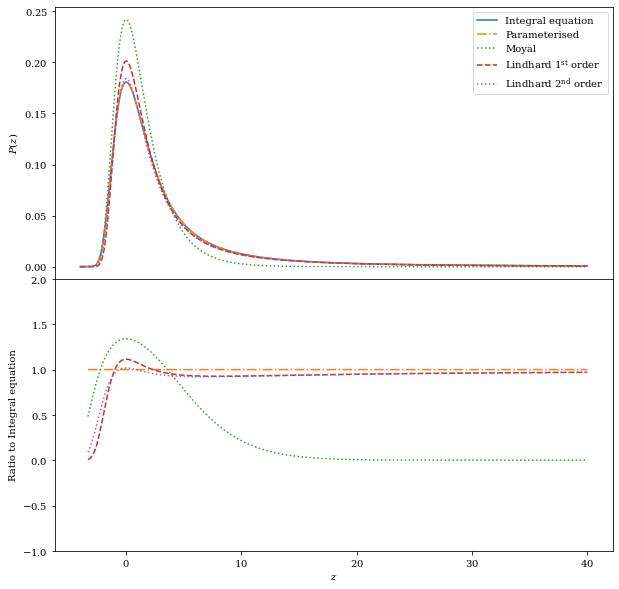

In [21]:
from matplotlib.pyplot import subplots 
from scipy.signal import argrelmax 

fig, ax = subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0},figsize=(10,10))
for k,v in data.items():
    ll = ax[0].plot(z,v['y'],v['ls'],label=k)
    v['color'] = ll[0].get_color()
    
    r = v['ratio']
    if r > 0:
        r = v['y']/tlz
        ax[1].plot(z,r,v['ls'],color=v['color'])
        ax[1].set_ylim(-1,2)
        
        
#ax[0].set_ylim(0.01*data['Integral equation']['y'][-1],
#               1.1*data['Moyal']['y'].max())
#ax[0].set_ylim(1e-5)
#ax[0].set_yscale('log')
ax[0].set_ylabel('$P(z)$')
ax[1].set_ylabel('Ratio to Integral equation')
ax[1].set_xlabel('$z$')
ax[0].legend();

In [22]:
zr  = (1e-2,40)
z   = linspace(zr[0],zr[1],int((zr[1]-zr[0])*100)+1)
mpv = 0
xi  = 1
tlz = tlandau (lindhard_y(z,order=1),mpv,xi)
vlz = landau  (lindhard_y(z,order=2),mpv,xi)
lz1 = lindhard(z,mpv,xi,order=1,shift=False,off=0)
lz2 = lindhard(z,mpv,xi,order=2,shift=False,off=0)

data = {'Integral equation': {'y': tlz,     'ratio':0, 'ls':'-' },
        'Parameterised':     {'y': vlz,     'ratio':2, 'ls':'-.'},
        r'Lindhard $1^{\mathrm{st}}$ order': 
        {'y': lz1, 'ratio': 1, 'ls':'--'},
        r'Lindhard $2^{\mathrm{nd}}$ order': 
        {'y': lz2, 'ratio': 1, 'ls':':'},
        }
for k,v in data.items():
    im       = argrelmax(v['y'])[0]
    v['max'] = z[im[-1]] if len(im)>=1 else -1000 
    print(f'{k:20s}: {v["max"]}')

/tmp/ipykernel_180100/3780046693.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I = [quad(lambda t: f(t,zz),0,inf) for zz in z]
/tmp/ipykernel_180100/3780046693.py:28: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I = [quad(lambda t: f(t,zz),0,inf) for zz in z]


Integral equation   : 0.73
Parameterised       : 0.85
Lindhard $1^{\mathrm{st}}$ order: 0.7100000000000001
Lindhard $2^{\mathrm{nd}}$ order: 0.8


/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = v['y']/tlz
/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = v['y']/tlz
/tmp/ipykernel_180100/487214922.py:11: RuntimeWarning: divide by zero encountered in true_divide
  r = v['y']/tlz


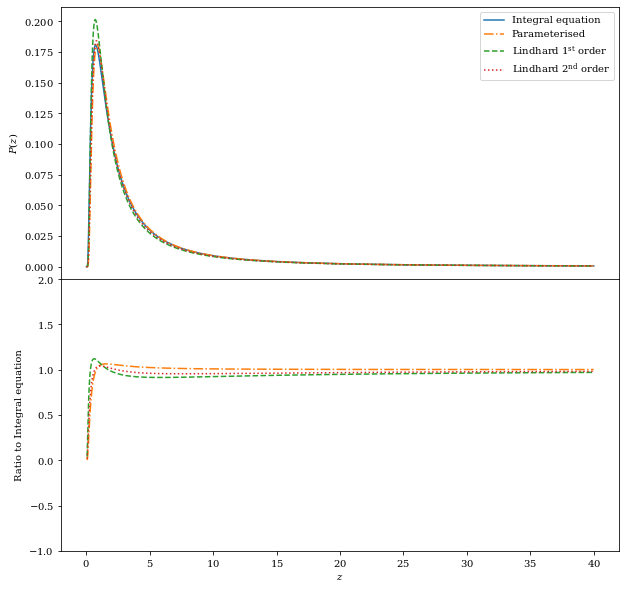

In [23]:
from matplotlib.pyplot import subplots 
from scipy.signal import argrelmax 

fig, ax = subplots(nrows=2,sharex=True,gridspec_kw={'hspace':0},figsize=(10,10))
for k,v in data.items():
    ll = ax[0].plot(z,v['y'],v['ls'],label=k)
    v['color'] = ll[0].get_color()
    
    r = v['ratio']
    if r > 0:
        r = v['y']/tlz
        ax[1].plot(z,r,v['ls'],color=v['color'])
        ax[1].set_ylim(-1,2)
        
        
#ax[0].set_ylim(0.01*data['Integral equation']['y'][-1],
#               1.1*data['Moyal']['y'].max())
#ax[0].set_ylim(1e-5)
#ax[0].set_yscale('log')
ax[0].set_ylabel('$P(z)$')
ax[1].set_ylabel('Ratio to Integral equation')
ax[1].set_xlabel('$z$')
ax[0].legend();

# Timing

We time the numerical parameterisation 

In [24]:
%timeit landau(z)

559 µs ± 6.85 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


and the integral expression 

In [25]:
%timeit tlandau(z)

2.25 s ± 386 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


We see that the parameterisation is 3 orders of magnitude faster. 

In [26]:
%timeit lindhard(z,order=1)

1.43 ms ± 202 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [27]:
%timeit lindhard(z,order=2)

1.93 ms ± 340 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
